# Bayesian Linear Regression
Using Bambi

In [1]:
import pymc as pm
import bambi as bmb
import pandas as pd
import arviz as az

In [2]:
pm.__version__

'4.0.1'

In [3]:
bmb.__version__

'0.9.0'

# Causal Inf Mixtape Example
https://mixtape.scunning.com/probability-and-regression.html#regression-anatomy-theorem

In [4]:
book_url = "https://raw.github.com/scunning1975/mixtape/master/auto.dta"

In [5]:
cars = pd.read_stata(book_url)

In [6]:
cars.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


## Univariate regression

In [7]:
model = bmb.Model("price ~ length", cars)
fitted = model.fit(draws=1000, tune=1000, method="nuts_blackjax")

/Users/canyon/miniconda3/envs/bayes/lib/python3.9/site-packages/aesara/link/jax/dispatch.py:87: UserWarning: JAX omnistaging couldn't be disabled: Disabling of omnistaging is no longer supported in JAX version 0.2.12 and higher: see https://github.com/google/jax/blob/main/design_notes/omnistaging.md.
  warnings.warn(f"JAX omnistaging couldn't be disabled: {e}")
/Users/canyon/miniconda3/envs/bayes/lib/python3.9/site-packages/pymc/sampling_jax.py:36: UserWarning: This module is experimental.
  warnings.warn("This module is experimental.")


Compiling...


Compilation time =  0:00:36.291328
Sampling...
Sampling time =  0:00:04.812790
Transforming variables...
Transformation time =  0:00:00.055418
Computing Log Likelihood...
Log Likelihood time =  0:00:01.662212


In [8]:
model

Formula: price ~ length
Family name: Gaussian
Link: identity
Observations: 74
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 6165.2568, sigma: 62665.299)
    length ~ Normal(mu: 0.0, sigma: 331.1608)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2929.4991)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

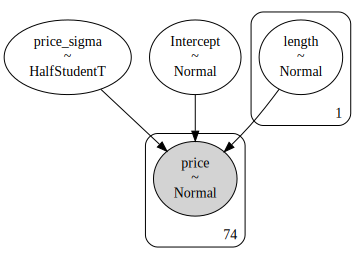

In [9]:
model.graph()

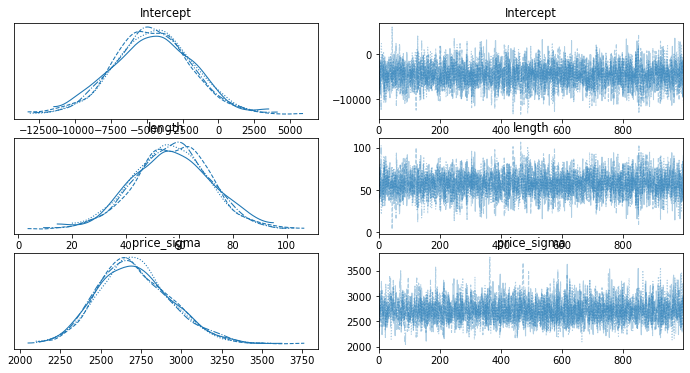

In [10]:
az.plot_trace(fitted);

In [11]:
az.summary(fitted)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-4571.240,2679.197,-9748.053,355.558,43.773,33.090,3731.0,3250.0,1.0
length,57.154,14.185,30.942,84.547,0.232,0.165,3727.0,3060.0,1.0
price_sigma,2714.477,231.195,2295.150,3151.426,3.928,2.849,3671.0,2426.0,1.0


## Multivariate Regression

In [20]:
model_2 = bmb.Model("price ~ length + weight + headroom + mpg", cars)
fitted_2 = model_2.fit(method="nuts_blackjax")

Compiling...
Compilation time =  0:00:04.789446
Sampling...
Sampling time =  0:00:06.312667
Transforming variables...
Transformation time =  0:00:00.087122
Computing Log Likelihood...
Log Likelihood time =  0:00:00.156002


In [21]:
model_2

Formula: price ~ length + weight + headroom + mpg
Family name: Gaussian
Link: identity
Observations: 74
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 6165.2568, sigma: 78517.9045)
    length ~ Normal(mu: 0.0, sigma: 331.1608)
    weight ~ Normal(mu: 0.0, sigma: 9.4876)
    headroom ~ Normal(mu: 0.0, sigma: 8716.0583)
    mpg ~ Normal(mu: 0.0, sigma: 1274.52)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2929.4991)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

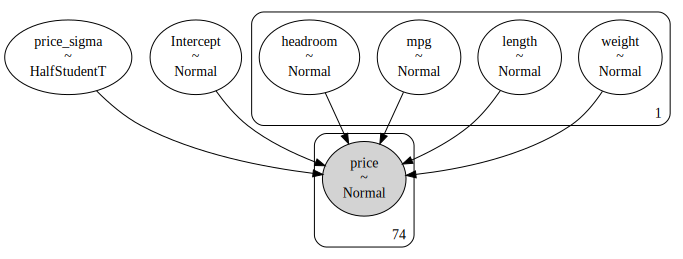

In [22]:
model_2.graph()

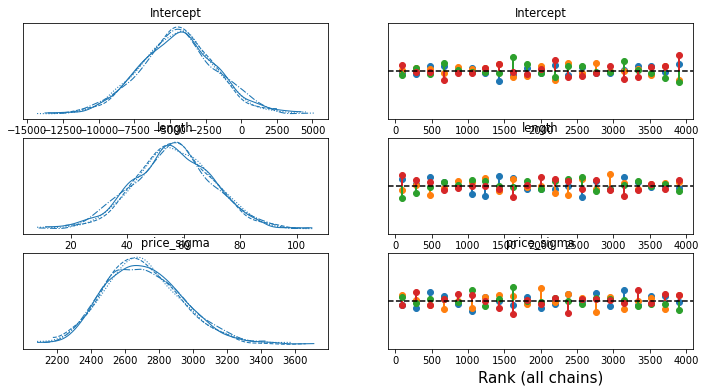

In [15]:
az.plot_trace(fitted_2, kind="rank_vlines");

In [26]:
az.summary(fitted_2, var_names=["length", "weight", "headroom", "mpg"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
length,-92.522,40.820,-173.354,-19.105,0.826,0.610,2454.0,2175.0,1.0
weight,4.285,1.175,2.121,6.519,0.024,0.017,2493.0,2220.0,1.0
headroom,-485.599,388.208,-1228.412,258.515,6.135,4.730,4028.0,3012.0,1.0
mpg,-85.521,85.646,-246.938,72.262,1.399,1.091,3787.0,2683.0,1.0


In [23]:
from bambi.plots import plot_cap
import matplotlib.pyplot as plt

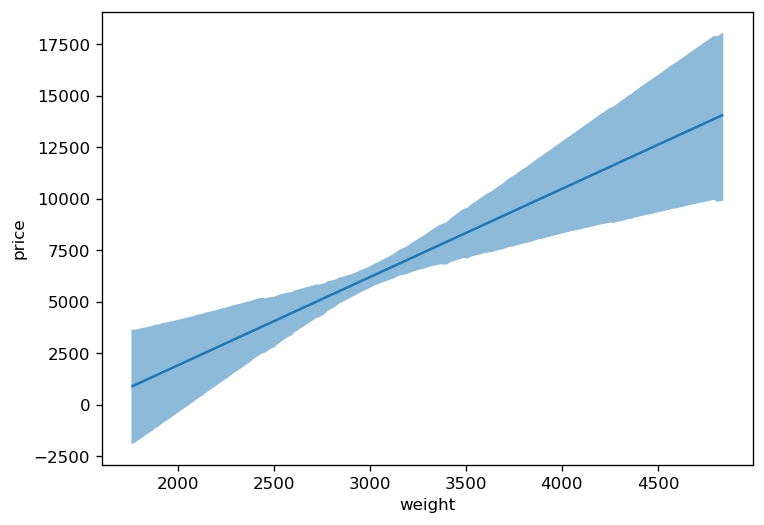

In [24]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=120)
plot_cap(model_2, fitted_2, "weight", ax=ax);